# 5. 추정과 가설검정(p135)

- 점추정: 모집단의 모수를 하나의 수치로 추정하는 방법(표본평균, 표본분산, 표본비율)
- 구간추정: 모집단의 모수가 일정한 신뢰수준 하에 포함될 것으로 예상되는 구간을 추정하는 방법
  - 유의수준(a): 제1종 오류(귀무가설이 참인데 대립가설을 선택할 확률)
  - 검정력(1-b): b는 제2종 오류로 대립가설이 참인데 귀무가설을 기각하지 않는 오류를 범할 확률
  *두 오류 간에는 상호 역의 관계 성립, 제1종 오류를 고정한 다음 제2종 오류를 줄이려면 표본의 크기를 늘려야 함

| 유형       | 검정 종류                        | 조건 요약                                      | 사용 분포           | 통계량 공식                                                                                          | 신뢰구간 / 비고                                                |
|------------|----------------------------------|------------------------------------------------|---------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|
| **일표본** | Z-검정                           | 모분산 σ² 알고 있음 또는 n ≥ 30                | Z-분포              | $Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$                                                       | $\bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$        |
|             -| t-검정                           | 모분산 모름, n < 30, 정규성 가정              | t-분포(df = n−1)    | $t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$                                                            | $\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$        |
| **이표본** | 독립 2표본 Z-검정                | 두 집단 모두 모분산 알고 있음                 | Z-분포              | $Z = \frac{\bar{x}_1 - \bar{x}_2 - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$            |                                                                 |
|            -| 독립 2표본 t-검정 (등분산)       | 모분산 모름, 정규성, 등분산 가정              | t-분포(df = n₁+n₂−2)| $t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$ ($s_p$: 풀링표준편차) |                                                                 |
|            -| 독립 2표본 t-검정 (이분산)       | 분산 다름 (Welch)                              | t-분포 (df 근사)    | $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$                      |                                                                 |
|            -| 대응표본 t-검정                  | 짝 데이터 (전후비교 등), 정규성 가정          | t-분포(df = n−1)    | $t = \frac{\bar{d}}{s_d / \sqrt{n}}$ ($\bar{d}$: 차이 평균)                                           |                                                                 |
| **K표본**  | 일원분산분석 (One-way ANOVA)     | 집단 ≥3, 정규성, 등분산 가정                  | F-분포              | $F = \frac{MS_{between}}{MS_{within}}$                                                                | 사후검정 필요 (Tukey HSD 등)                                   |
|            -| 이원분산분석 (Two-way ANOVA)     | 두 개 범주형 독립변수, 상호작용 포함 가능     | F-분포              | 교호작용 포함된 분산비 산출                                                                           |                                                                 |
|            -| 반복측정 ANOVA                   | 동일 집단 반복 측정, 구형성 가정 필요         | F-분포              | 피험자 내 요인 고려                                                                                  | Mauchly's Test로 구형성 확인                                   |
|            -| 혼합설계 ANOVA (Mixed)           | 독립 + 반복 측정 요인 혼합 설계               | F-분포              | 반복요인, 독립요인 동시 고려                                                                          | 설계 복잡도 ↑                                                  |





  
## 1. 일표본(One-sample)
- 모평균 추정과 가설검정: Z분포, t분포

In [1]:
import numpy as np
from scipy.stats import norm 

#모표준편차를 아는 경우 모평균의 추정
s_mean = 31100 #표본평균
n = 36 #표본크기
sd = 4500 #표본편차
a = 0.05 #신뢰수준

se = sd / np.sqrt(n) #표준오차
z = norm.ppf(1-a/2) #신뢰계수(양측이니 2로 나눔)
me = se*z #허용오차

print(f"점추정(평균): {s_mean}")
print(f"구간추정(유의수준 5%): {s_mean-me:.2f} ~ {s_mean+me:.2f}")
print(f"오차의 한계: {me:.3f}")

점추정(평균): 31100
구간추정(유의수준 5%): 29630.03 ~ 32569.97
오차의 한계: 1469.973


In [2]:
#오차의 한계에 따른 표본 규모
#오차의 한계(허용오차)가 500 이하일 확률이 0.95(95%)가 되도록 모집단 평균의 추정치를 원하는 경우, 표본규모는?
me = 500
a = 0.05 #신뢰수준 95% 기준
z = norm.ppf(1-a/2)
sample_size = np.square(sd)/np.square(me/z) # 분산/[(허용오차/z값)^2]

print(f"유의수준 5% 하 허용오차가 500 이하일 확률이 95%일 경우 표본 수는 {sample_size:.2f} 이상")

유의수준 5%하 허용오차가 500 이하일 확률이 95%일 경우 표본 수는 311.16 이상


In [3]:
#모평균의 가설검정
# H0: 평균은 0이다. / H1: 평균은 0이 아니다.

x = 31100 #표본평균
n = 36 #표본수
sd = 4500 #모표준편차
mu0 = 30000 #귀무가설의 모평균
test_a = 0.05 # 신뢰수준 5%

se = sd/np.sqrt(n) #표준오차
zstat = (x-mu0)/se #검정통계량 z

#단측(right, left)/양측 검정에 따른 유의확률과 임계값

def choice_oneway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        z = norm.ppf(1-test_a/2)
        true_r = [x - z*se, x + z*se] #신뢰구간
        p_value = (1-norm.cdf(np.abs(zstat)))*2 #양측이니까 *2
        
    elif op == 1:
        z = norm.ppf(1-test_a)
        true_r = [x+z*se]
        p_value = 1-norm.cdf(zstat)
    else:
        z = norm.ppf(test_a)
        true_r = [x-z*se]
        p_value = norm.cdf(zstat)
    print(f"검정통계량: {zstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")

choice_oneway(0)

검정통계량: 1.467
신뢰구간: [29630.02701159496, 32569.97298840504]
p_value 0.142로 귀무가설을 기각하지 못함


In [4]:
#모표준편차를 모르는 경우: t분포
from scipy.stats import t

x = 650
n = 16 # 표본집단이 30 미만이므로 중심극한정리 사용 x
s = 55 #표본표준오차
a = 0.05
df = n-1 #t분포 자유도

se = s/np.sqrt(n)
conf_t = t.ppf(1-a/2, df)
me = conf_t*se

print("<모표준편차를 모르는 경우: t분포")
print(f"점추정(평균): {x}")
print(f"구간추정(유의수준 5%): {x-me:.2f} ~ {x+me:.2f}")
print(f"오차의 한계: {me:.3f}")

<모표준편차를 모르는 경우: t분포
점추정(평균): 650
구간추정(유의수준 5%): 620.69 ~ 679.31
오차의 한계: 29.307


In [5]:
# (위 조건에 이어서) 오차의 한계가 20이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는?

me2 = 20
a = 0.05
tt = t.ppf(1-a/2, df)
sample_size = np.square(s)/np.square(me2/tt)
print(f"유의수준 5% 하 허용오차가 20 이하일 확률이 95%일 경우 표본 수는 {sample_size:.1f} 이상")

유의수준 5% 하 허용오차가 20 이하일 확률이 95%일 경우 표본 수는 34.4 이상


In [6]:
#모평균의 가설검정(one-sample t-test)
#H0: mu=0 / H1: mu != 0

mu0 = 600
test_a = 0.05
x = 650
n = 16
s = 55
df = n-1

se = s / np.sqrt(n)
tstat = (x-mu0)/se

#단측, 양측 검정에 따른 유의확률과 임계값
#단측(right, left)/양측 검정에 따른 유의확률과 임계값

def choice_t_oneway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        tt = t.ppf(1-test_a/2, df) #t a/2
        true_r = [x - tt*se, x + tt*se] #신뢰구간
        p_value = (1-t.cdf(np.abs(tstat), df))*2 #양측이니까 *2
        
    elif op == 1:
        tt = t.ppf(1-test_a, df)
        true_r = [x+tt*se]
        p_value = 1-t.cdf(tstat, df)
    else:
        tt = t.ppf(test_a, df)
        true_r = [x-z*se]
        p_value = t.cdf(tstat, df)
    print(f"검정통계량: {tstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")

# one-right(mu > mu0)
choice_t_oneway(1)

검정통계량: 3.636
신뢰구간: [674.1044423907726]
p_value 0.001로 귀무가설을 기각


## 모비율의 추정과 가설검정: Z분포
- p: 모비율, p0: 귀무가설 모비유, ^p: 표본비율, n: 표본크기, Za/2: 신뢰계수

In [7]:
# 모비율 추정
n = 500 #표본크기
p = 220/n #표본비율
a = 0.05
se = np.sqrt((p*(1-p))/n)
z = norm.ppf(1-a/2)
me = z*se


print(f"점추정(모비율): {p}")
print(f"구간추정(유의수준 5%): {p-me:.3f} ~ {p+me:.3f}")
print(f"오차의 한계: {me:.3f}")

점추정(모비율): 0.44
구간추정(유의수준 5%): 0.396 ~ 0.484
오차의 한계: 0.044


In [8]:
#표본규모 계산: 모비율 p를 아는 경우 p 사용, 아니면 표본비율 p 로 계산, 두 정보 모두 모르면 p=0.5로 계산
# 오차의 한계가 0.03 이하일 확률이 0.99가 되도록 모집단 비율의 추정치를 원하는 경우 표본규모는?

me = 0.03
a = 0.01
z = norm.ppf(1-a/2)

p_sample_size = (p*(1-p))/np.square(me/z)

print(f"오차의 한계가 0.03일 확률이 99%인 경우의 표본규모는 {p_sample_size:.1f} 이상")

오차의 한계가 0.03일 확률이 99%인 경우의 표본규모는 1816.5 이상


In [9]:
# 모비율의 가설검정
# H0: P = P0 / H1: P!= P0

n = 500
p = 220/n
p0 = 0.5 # 귀무가설 모비율
test_a = 0.05

se = np.sqrt((p0*(1-p0))/n)
zstat = (p - p0)/se 

def choice_pz_oneway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        z = norm.ppf(1-test_a/2) #z a/2
        true_r = [p - z*se, p + z*se] #신뢰구간
        p_value = (1-norm.cdf(np.abs(zstat)))*2 #양측이니까 *2
        
    elif op == 1:
        z = norm.ppf(1-test_a)
        true_r = [x+z*se]
        p_value = 1-norm.cdf(zstat)
    else:
        z = norm.ppf(test_a)
        true_r = [x-z*se]
        p_value = norm.cdf(zstat)
    print(f"검정통계량: {zstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")

# two
choice_pz_oneway(0)

검정통계량: -2.683
신뢰구간: [0.3961738729711709, 0.4838261270288291]
p_value 0.007로 귀무가설을 기각


#### 모분산의 추정과 가설검정: 카이제곱 분포

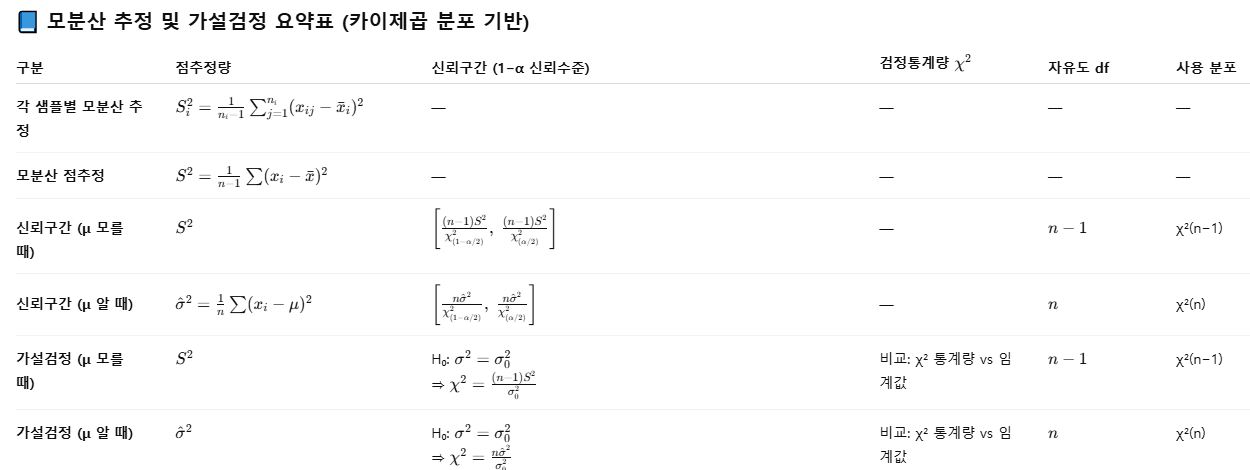

In [326]:
# 모평균을 모르는 경우 모분산의 추정
n = 10 #표본크기
v = 3.4 #표본분산
df = n-1 #자유도
a = 0.05 #신뢰구간

from scipy.stats import chi2

conf1 = chi2.ppf(1-a/2,df)#하한
conf2 = chi2.ppf(a/2, df) #상한

down = df*v/conf1
up = df*v/conf2

print(f"모평균을 모를 때 유의수준 5% 하에서 모분산 신뢰구간 추정: {down:.3f} ~ {up:.3f}")
print(f"모분산 점추정량: {v}")

모평균을 모를 때 유의수준 5% 하에서 모분산 신뢰구간 추정: 1.609 ~ 11.332
모분산 점추정량: 3.4


In [332]:
# 가설검정(왼쪽검정)
#H0: 표본분산과 모분산은 같다.(표본분산: 0) / H1: 표분분산 < v0

n = 10
v = 3.4
df = n-1
v0 = 3.6
test_a = 0.05

c_stat = df*v/v0

def choice_c_oneway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        if chi2.cdf(c_stat, df) < 0.5:
            p_value = (chi2.cdf(np.abs(c_stat), df))*2
        else:
            p_value = (1-chi2.cdf(np.abs(c_stat), df))*2 #양측이니까 *2
        
    elif op == 1:
        p_value = 1-chi2.cdf(c_stat, df)
    else:
        p_value = chi2.cdf(c_stat, df)
    print(f"검정통계량: {c_stat:.3f}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")

# left
choice_c_oneway(2)

검정통계량: 8.500
p_value 0.515로 귀무가설을 기각하지 못함


## 2. 이표본(Two-sample)
### 독립표본 모평균 차이의 추정과 가설검정: Z분포, t분포
- u1 - u2: 모평균의 차
- u0(1) - u0(2): 귀무가설의 모평균의 차
- X1 - X2: 표본평균의 차

| **검정 유형**         | **사용 조건**                     | **자유도(df) 공식**                                                                                                                                                                        | **비고**               |
| ----------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------- |
| **단일표본 t검정**      | 하나의 표본 평균 vs 모평균 비교           | $df = n - 1$                                                                                                                                                                          | n: 표본 크기             |
| **대응표본 t검정**      | 동일 집단의 전후 비교 (쌍별 비교)          | $df = n - 1$                                                                                                                                                                          | n: 쌍의 개수 (차이값 개수)    |
| **이표본 t검정 (등분산)** | 독립된 두 집단, 등분산 가정              | $df = n_1 + n_2 - 2$                                                                                                                                                                  | Pooled variance 사용   |
| **이표본 t검정 (이분산)** | 독립된 두 집단, 등분산 가정하지 않음 (Welch) | $df = \frac{ \left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2 }{ \frac{ \left( \frac{s_1^2}{n_1} \right)^2 }{n_1 - 1} + \frac{ \left( \frac{s_2^2}{n_2} \right)^2 }{n_2 - 1} }$ | **소수점 df** 사용, 계산 복잡 |


In [75]:
#표본의 크기가 30이상이고 모집단의분산을 아는 경우 독립표본 모평균 차이의 추정(z)
x1 = 78 #1번 모집단의 표본평균
x2 = 70 #2번 모집단 표본평균
std1 = 4.8 #1번 모집단 모표준편차
std2 = 3.1 #2번 모집단 모표준편차
n1= 16 #1번 모집단 수
n2 = 25 #2번 모집단 수
a = 0.05 #신뢰수준

d = x1 - x2 # 두 모평균 차이의 점추정값
se = np.sqrt(std1**2/n1 + std2**2/n2)
z = norm.ppf(1-a/2)
me = z*se

print(f"점추정량: {d:.3f}")
print(f"오차의 한계: {me}")
print(f"구간추정량: {x1-x2-me:.3f} ~ {x1-x2+me:.3f}")

점추정량: 8.000
오차의 한계: 2.6473302537602597
구간추정량: 5.353 ~ 10.647


In [77]:
#독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 0(두 독립표본의 평균은 같다.) / H1: 모평균의 차 0 아님(두 독립표본의 평균은 차이있음)
#신뢰구간 상에 0이 포함 x

test_a = 0.05
d = x1 - x2
se = np.sqrt(std1**2/n1  + std2**2/n2)
zstat = (x1-x2-0)/se #u1-u2=0(귀무)

def choice_z_twoway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        z = norm.ppf(1-test_a/2) #z a/2
        true_r = [d - z*se, d + z*se] #신뢰구간
        p_value = (1-norm.cdf(np.abs(zstat)))*2 #양측이니까 *2
        
    elif op == 1:
        z = norm.ppf(1-test_a)
        true_r = [d+z*se]
        p_value = 1-norm.cdf(zstat)
    else:
        z = norm.ppf(test_a)
        true_r = [d-z*se]
        p_value = norm.cdf(zstat)
    print(f"검정통계량: {zstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")
choice_z_twoway(0)

검정통계량: 5.923
신뢰구간: [5.352669746239741, 10.64733025376026]
p_value 0.000로 귀무가설을 기각


In [80]:
#표본의 크기가 30미만이고, 모집단의 분산을 모르지만 같다는 것을 알고 있는 경우
# 독립표본 모평균 차이의 추정(t분포)

x1 = 85
x2 = 81
s1 = 4
s2 = 5
n1 = 12
n2 = 10
a = 0.05

d = x1 - x2
df = n1+n2 -2
pv = ((n1-1)*(s1**2)+(n2-1)*(s2**2))/df #합동분산

se = np.sqrt(pv)*np.sqrt(1/n1+1/n2)
tstat = t.ppf(1-a/2, df)
me = tstat*se

print(f"점추정량: {d}")
print(f"오차의 한계: {me:.3f}")
print(f"구간추정량: {d-me:.3f} ~ {d+me:.3f}")

점추정량: 4
오차의 한계: 3.999
구간추정량: 0.001 ~ 7.999


In [83]:
# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 0(두 독립표본의 평균은 같다.) / H1: 모평균의 차 0 아님(두 독립표본의 평균은 차이있음)
test_a = 0.05
d0 = 0
d = x1 - x2
df = n1 + n2 -2
pv = ((n1-1)*(s1**2)+(n2-1)*(s2**2))/df
se = np.sqrt(pv)*np.sqrt(1/n1+1/n2)
tstat = (d-d0)/se

def choice_t_twoway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        tt = t.ppf(1-test_a/2, df)
        true_r = [d - tt*se, d + tt*se] #신뢰구간
        p_value = (1-t.cdf(np.abs(tstat), df))*2 #양측이니까 *2
        
    elif op == 1:
        tt = t.ppf(1-test_a, df)
        true_r = [d+tt*se]
        p_value = 1-t.cdf(tstat)
    else:
        tt = t.ppf(test_a, df)
        true_r = [d-tt*se]
        p_value = t.cdf(tstat)
    print(f"검정통계량: {tstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")
choice_t_twoway(0)

검정통계량: 2.086
신뢰구간: [0.0006943213868382259, 7.999305678613162]
p_value 0.050로 귀무가설을 기각


In [86]:
#표본의 크기가 30미만이고 모집단의 분산을 모르지만 다르다고 알고 있을 경우
# 독립표본 모평균 차이의 추정
x1 = 85
x2 = 81
s1 = 4
s2 = 5
n1 = 12
n2 = 10
a = 0.05

d = x1 - x2
df = (s1**2/n1+s2**2/n2)**2/(1/(n1-1)*(s1**2/n1)**2 + 1/(n2-1)*(s2**2/n2)**2)

se = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = t.ppf(1-a/2, df)
me = tstat*se

print(f"점추정량: {d}")
print(f"오차의 한계: {me:.3f}")
print(f"구간추정량: {d-me:.3f} ~ {d+me:.3f}")
print(f"자유도: {df:.3f}")

점추정량: 4
오차의 한계: 4.128
구간추정량: -0.128 ~ 8.128
자유도: 17.165


In [87]:
# 위 조건에 따른 가설검정
test_a = 0.05
d0 = 0
d = x1 - x2
tstate = (d-d0)/se


def choice_t2_twoway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        tt = t.ppf(1-test_a/2, df)
        true_r = [d - tt*se, d + tt*se] #신뢰구간
        p_value = (1-t.cdf(np.abs(tstat), df))*2 #양측이니까 *2
        
    elif op == 1:
        tt = t.ppf(1-test_a, df)
        true_r = [d+tt*se]
        p_value = 1-t.cdf(tstat)
    else:
        tt = t.ppf(test_a, df)
        true_r = [d-tt*se]
        p_value = t.cdf(tstat)
    print(f"검정통계량: {tstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")
choice_t2_twoway(0)

검정통계량: 2.108
신뢰구간: [-0.12776068933965323, 8.127760689339652]
p_value 0.050로 귀무가설을 기각하지 못함


In [89]:
# 위 내용과 똑같은 라이브러리(2 샘플 독립표본 모평균 차 검정)
from scipy.stats import ttest_ind
X1 = [1, 3, 5, 7, 9]
X2 = [9, 11, 13, 15]

#equal_var : 모집단의 분산이 동일한지 여부
#alternative: two-sided, less, greater

tstat, p = ttest_ind(X1, X2, equal_var=True, alternative='two-sided')

print(f"검정통계량/p-value: {tstat:.3f} / {p:.3f}")


검정통계량/p-value: -3.564 / 0.009


## 대응표본 모평균 차이의 추정과 가설검정: z분포, t분포
- 30 이상인 경우: z분포
- 30 미만인 경우 : t분포

In [115]:
#표본의 크기가 30미만인 경우(t분포)
#대응표본 모평균 차이의 추정
x1 = np.array([75, 83, 96, 77, 81, 90, 82, 67, 94, 85, 78, 82, 96, 80, 87, 81])
x2 = np.array([80, 90, 92, 75, 86, 90, 81, 70, 89, 88, 82, 79, 91, 90, 78, 89])

n = len(x1)
df = n - 1
a = 0.05

d = x1 - x2 #두 데이터의 차이
d_mean = d.mean()
# std = np.sqrt(sum((d-d_mean)**2)/df)
std = d.std(ddof=1)
se = std/np.sqrt(n)
tt = t.ppf(1-a/2, df)
me = tt*se

print(f"점추정량: {d_mean}") #두 대응표본 차의 평균
print(f"오차의 한계: {me:.3f}")
print(f"구간 추정량: {d_mean - me:.3f} ~ {d_mean + me: .3f}")

점추정량: -1.0
오차의 한계: 2.893
구간 추정량: -3.893 ~  1.893


In [117]:
# 위에 따른 가설검정
# H0: 모평균 차는 0이다. / H1: 모평균 차는 0이 아니다.

test_a = 0.05
d0 = 0
tstat = (d_mean - d0)/se

def choice_t3_twoway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        tt = t.ppf(1-test_a/2, df)
        true_r = [d_mean - tt*se, d_mean + tt*se] #신뢰구간
        p_value = (1-t.cdf(np.abs(tstat), df))*2 #양측이니까 *2
        
    elif op == 1:
        tt = t.ppf(1-test_a, df)
        true_r = [d_mean+tt*se]
        p_value = 1-t.cdf(tstat)
    else:
        tt = t.ppf(test_a, df)
        true_r = [d_mean-tt*se]
        p_value = t.cdf(tstat)
    print(f"검정통계량: {tstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")
choice_t3_twoway(0)

검정통계량: -0.737
신뢰구간: [-3.892547973562949, 1.892547973562949]
p_value 0.473로 귀무가설을 기각하지 못함


In [118]:
# 라이브러리 검정(이걸 쓸 것!)

from scipy.stats import ttest_rel

tstat, p = ttest_rel(x1, x2, alternative='two-sided')
print("라이브러리 t 대응표본 검정")
print(f"검정통계량: {tstat:.3f} / 유의확률: {p:.3f}")

라이브러리 t 대응표본 검정
검정통계량: -0.737 / 유의확률: 0.473


In [119]:
# 대응표본 크기가 30이상인 경우: z 검정

np.random.seed(0)
x1 = np.random.randint(80, 100, 40)
x2 = np.random.randint(80, 100, 40)
n = len(x1)
df = n-1
a = 0.05

d = x1 - x2
d_mean = d.mean()
std = d.std(ddof=1)
se = std/np.sqrt(n)
z = norm.ppf(1-a/2)
me = se*z

print(f"점추정량: {d_mean}") #두 대응표본 차의 평균
print(f"오차의 한계: {me:.3f}")
print(f"구간 추정량: {d_mean - me:.3f} ~ {d_mean + me: .3f}")

점추정량: 2.275
오차의 한계: 2.781
구간 추정량: -0.506 ~  5.056


In [121]:
# 대응푶본 모평균 차의 가설검정 : z
test_a = 0.05
d0 = 0
zstat = (d_mean - d0)/se

def choice_z3_twoway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        z = norm.ppf(1-test_a/2)
        true_r = [d_mean - z*se, d_mean + z*se] #신뢰구간
        p_value = (1-norm.cdf(np.abs(zstat)))*2 #양측이니까 *2
        
    elif op == 1:
        z = norm.ppf(1-test_a)
        true_r = [d_mean+z*se]
        p_value = 1-norm.cdf(zstat)
    else:
        z = norm.ppf(test_a, df)
        true_r = [d_mean-z*se]
        p_value = norm.cdf(zstat)
    print(f"검정통계량: {zstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")
choice_z3_twoway(0)

검정통계량: 1.604
신뢰구간: [-0.5056663862477926, 5.055666386247792]
p_value 0.109로 귀무가설을 기각하지 못함


In [122]:
# 라이브러리: z test는 없어서 직접구현 필요
from scipy.stats import ttest_rel

zstat, p = ttest_rel(x1, x2, alternative='two-sided')

print("라이브러리 z 대응표본 검정")
print(f"검정통계량: {zstat:.3f} / 유의확률: {p:.3f}")

라이브러리 z 대응표본 검정
검정통계량: 1.604 / 유의확률: 0.117


## 모비율 차이의 추정과 가설검정: z분포

In [123]:
# 독립표본 모비율 차이의 추정
n1 = 250 #캠페인 후의 인지도(관심있는 대상)
p1 = 120/n1
n2 = 150 # 캠페인 전의 인지도
p2 = 60/n2
a = 0.05

d = p1- p2 # 모비율 차
z = norm.ppf(1-a/2)
se = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
me = z*se

print(f"점 추정량: {d:.3f}")
print(f"오차 한계: {me:.3f}")
print(f"구간 추정량: {d - me:.3f} ~ {d + me:.3f}")


점 추정량: 0.080
오차 한계: 0.100
구간 추정량: -0.020 ~ 0.180


In [125]:
# 독립표본 모비유 차이의 가설검정
# H0: 모비율 차이는 없다.(0) / H1: 모비율 차이는 있다.

d0 = 0
pp = (n1*p1 + n2*p2) / (n1+n2) #합동표본비율
se2 = np.sqrt(pp*(1-pp)*(1/n1+1/n2))
zstat = (p1-p2-d0)/se2

def choice_zp_twoway(op): #0: 양측, 1:right, 2:left
    if op == 0:
        z = norm.ppf(1-test_a/2)
        true_r = [d - z*se, d + z*se] #신뢰구간
        p_value = (1-norm.cdf(np.abs(zstat)))*2 #양측이니까 *2
        
    elif op == 1:
        z = norm.ppf(1-test_a)
        true_r = [d+z*se]
        p_value = 1-norm.cdf(zstat)
    else:
        z = norm.ppf(test_a, df)
        true_r = [d-z*se]
        p_value = norm.cdf(zstat)
    print(f"검정통계량: {zstat:.3f}")
    print(f"신뢰구간: {true_r}")
    print(f"p_value {p_value:.3f}로 귀무가설을", "기각" if p_value < 0.05 else "기각하지 못함")

# one-right
choice_zp_twoway(1)

검정통계량: 1.557
신뢰구간: [0.1638455968499331]
p_value 0.060로 귀무가설을 기각하지 못함


## 모분산 비의 추정과 가설 검정: F 분포
- 모집단의 분산을 비교하는 경우, 분산의 비가 1보다 큰지 작은지 여부 확인

In [129]:
# 모분산 비의 추정
from scipy.stats import f

x1 = np.array([272, 255, 278, 282, 296, 312, 356, 296, 302, 312])
x2 = np.array([276, 280, 369, 285, 303, 317, 290, 250, 313, 307])

n1 = len(x1)
n2 = len(x2)
df1 = n1-1
df2 = n2-1 
v1 = x1.std(ddof=1)**2 #표본분산
v2 = x2.std(ddof=1)**2

a = 0.05
fstat = v1/v2
f1 = f.ppf(a/2, df2, df1)
f2 = f.ppf(1-a/2, df2, df1)

down = f1*fstat
up = f2*fstat

print(f"점 추정량: {fstat:.3f}")
print(f"구간추정량: {down:.3f} ~ {up:.3f}")

점 추정량: 0.764
구간추정량: 0.190 ~ 3.075


In [131]:
# 모분산 비의 가설검정
# H0: 모분산 비는 1이다. / H1: 모분산 1 < 모분산 2(one-left)
v0 = 1
trust = []

def choice_f_twoway(op): #0: 양측, 1:right(1 > 2), 2:left(1 < 2)
    if op == 0:
        if f.cdf(fstat, df1, df2) < 0.5:
            sp = f.cdf(fstat, df1, df2)*2 #유의확률
        else:
            sp = (1-f.cdf(fstat, df1, df2))*2
        trust.append(f.ppf(a/2, df1, df2))
        trust.append(f.ppf(1-a/2, df1, df2))
    elif op == 1:
        sp = 1-f.cdf(fstat, df1, df2)
        up = f.ppf(1-a/2, df1, df2)
        trust.append(f.ppf(a/2, df1, df2))
    else:
        sp = f.cdf(fstat, df1, df2)
        down = f.ppf(a/2, df1, df2)
        trust.append(f.ppf(1-a/2, df1, df2))
    print(f"검정통계량: {fstat:.3f}")
    print(f"신뢰구간: {trust}")
    print(f"p_value {sp:.3f}로 귀무가설을", "기각" if sp < 0.05 else "기각하지 못함")

# one-left
choice_f_twoway(2)

검정통계량: 0.764
신뢰구간: [4.025994158282978]
p_value 0.347로 귀무가설을 기각하지 못함


# 3. 분산분석의 가정
**분산분석은 3개 이상의 집단의 모평균 차이를 검정하기 위해** 전체 제곱합과 자유도를 전체와 오차로 분할하는 과정이다.  
분산분석을 시행하기 위해서는 가정을 충족해야 한다. 
- 정규성: 각 표본의 반응변수는 정규분포여야 한다.
  - 검정방법: Shapiro(소규모샘플), Anderson-Darling(대규모샘플), Kolmogorov-Smirnov, Jarque-Bera, QQ plot
  - H0: 표본의 모집단이 정규분포와 차이가 없다.(만족) / H1: 표본의 모집단이 정규분포와 차이가 있다. 
- 등분산성: 모든 집단의 반응변수의 분산이 동일해야 한다.
  - 검정방법: Bartlett 검정(정규성 만족하는 샘플), Levene 검정(정규성 만족하지 않는 샘플)
  - H0: 집단 간 모분산에는 차이가 없다.(만족) / H1: 집단 간 모분산에는 차이가 있다.
- 독립성: 각 관찰값은 독립적이여야 한다.

**※ 일반적으로 수집한 관찰값은 독립적으로 수집되었다고 보기 때문에 독립성 검정은 진행하지 않는 편이다.**  
**※ 분산분석을 진행하기 전 샘플의 정규성과 등분산 검정을 통해 가정을 충족하는지 여부를 확인한다.**

## 정규성 검정

shapiro test 통계량/p-value: 0.993 / 0.869
andelson-darling test 통계량/임계치/유의수준: 0.181 / 0.759 / 0.050
KS test 통계량/p-value: 0.058 / 0.867
jarque_bera test 통계량/p-value: 0.597 / 0.742


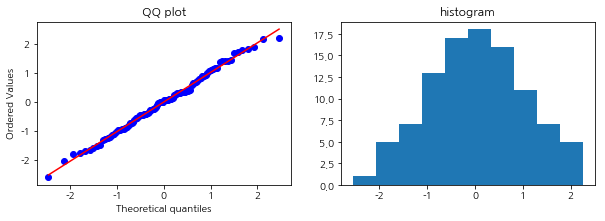

In [149]:
# 정규성을 만족하는 데이터 생성: 모든 검정에서 정규성 만족
from scipy.stats import norm

dt = norm.rvs(size=100, random_state=0)

#정규성 검정
from scipy.stats import shapiro, anderson, jarque_bera, kstest, zscore, probplot

#Shapiro 검정: 검정통계량, p-value 반환
s_stat, p1 = shapiro(dt)
print(f'shapiro test 통계량/p-value: {s_stat:.3f} / {p1:.3f}') 

# 안델슨-델링 검정: 검정통계량, 임계치, 유의수준
a_stat, cv, sl =anderson(dt, dist='norm') 
print(f'andelson-darling test 통계량/임계치/유의수준: {a_stat:.3f} / {cv[2]:.3f} / {sl[2]*0.01:.3f}') 

#KS(콜모고로프 스미르노프) test: 검정통계량, p-value
ks_stat, p3 = kstest(dt, cdf=norm.cdf)
print(f'KS test 통계량/p-value: {ks_stat:.3f} / {p3:.3f}')

# jarque_bera: 검정통계량, p-value, 왜도, 첨도
j_stat, p4 = jarque_bera(dt)
print(f'jarque_bera test 통계량/p-value: {j_stat:.3f} / {p4:.3f}')

# QQ plot and histogram
import matplotlib.pyplot as plt
zdata = zscore(dt)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

#QQ plot: 데이터들이 대각선에 붙어있을수록 정규성을 만족
(osm, odr), (slope, intercept, r) = probplot(zdata, plot=ax[0])
ax[0].set_title('QQ plot')

#histogram
ax[1].hist(dt)
ax[1].set_title('histogram')

plt.show()

## 등분산 검정
### k표본 등분산 검정(Bartlett: 정규성 만족)

In [151]:
from scipy.stats import bartlett

dt1 = norm.rvs(size=50, random_state=0)
dt2 = norm.rvs(size=50, random_state=1)
dt3 = norm.rvs(size=50, random_state=2)

b_stat, p = bartlett(dt1, dt2, dt3)
print(f"등분산 검정[정규성 만족]:stat {b_stat:.3f}, p-value: {p:.3f}") # 등분산 만족

등분산 검정[정규성 만족]:stat 1.082, p-value: 0.582


### k 표본 등분산 검정(Levene: 정규성 불만족)

In [158]:
from scipy.stats import levene
import pandas as pd

dd = np.array([[48, 54, 57, 54, 62], 
              [73, 63, 66, 64, 74], 
              [51, 63, 61, 54, 56]])

dt = pd.DataFrame(dd.T, columns=['fac1', 'fac2', 'fac3'])

l_stat, p = levene(dt['fac1'], dt['fac2'], dt['fac3'], center='mean')
print(f"등분산 검정[정규성 만족]:stat {l_stat:.3f}, p-value: {p:.3f}") # 등분산 만족

등분산 검정[정규성 만족]:stat 0.145, p-value: 0.867


In [181]:
#수기: 표본수가 동일한 검정

a = 0.05

n1 = n2 = n3 = len(dt)
N = n1+n2+n3 # 총 표본수
k = dt.shape[1] # 그룹의 수(수준 수)
df1 = k - 1 # 모집단 자유도
df2 = N - k # 오차 자유도(총 표본수 - 그룹수)
df3 = N - 1 # 전체자유도(총 표본수 - 1)

l_mean = dt.mean().values #각 수준의 평균
zij1 = np.abs(dt['fac1'] - l_mean[0]) #각 오차
zij2 = np.abs(dt['fac2'] - l_mean[1])
zij3 = np.abs(dt['fac3'] - l_mean[2])
zi1 = zij1.mean() #오차평균
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum()+zij3.sum())/N #전체 오차 평균

F = df2 / df1 * (n1*(zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / sum((zij1-zi1)**2 + (zij2-zi2)**2 + (zij3-zi3)**2)

from scipy.stats import f

cv = f.ppf(1-a, df1, df2) #F가 cv보다 크면 기각
sp = 1-f.cdf(F, df1, df2)

print(f"오른쪽 검정의 임계값: {cv:.3f} / 검정통계량: {F:.3f}")
print(f"유의수준 / 유의확률: {a} / {sp:.3f}")

오른쪽 검정의 임계값: 3.885 / 검정통계량: 0.145
유의수준 / 유의확률: 0.05 / 0.867


In [199]:
#수기: 표본수가 다른 검정
a = 0.05

dt = np.array([[36, 41, 42, 49], [40, 48, 39, 45, 44], [35, 37, 42, 34, 32]])

n1, n2, n3 = len(dt[0]), len(dt[1]), len(dt[2])
N = n1+n2+n3 # 총 표본수
k = len(dt) # 그룹의 수(수준 수)
df1 = k - 1 # 모집단 자유도
df2 = N - k # 오차 자유도(총 표본수 - 그룹수)
df3 = N - 1 # 전체자유도(총 표본수 - 1)

l_mean = []

for d in dt:#각 수준의 평균
    l_mean.append(np.mean(d))

zij1 = np.abs(dt[0] - l_mean[0]) #각 오차
zij2 = np.abs(dt[1] - l_mean[1])
zij3 = np.abs(dt[2] - l_mean[2])
zi1 = zij1.mean() #오차평균
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum()+zij3.sum())/N #전체 오차 평균

F = df2 / df1 * (n1*(zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / (sum((zij1-zi1)**2) + sum((zij2-zi2)**2) + sum((zij3-zi3)**2))

from scipy.stats import f

cv = f.ppf(1-a, df1, df2) #F가 cv보다 크면 기각
sp = 1-f.cdf(F, df1, df2)

print(f"오른쪽 검정의 임계값: {cv:.3f} / 검정통계량: {F:.3f}")
print(f"유의수준 / 유의확률: {a} / {sp:.3f}")

오른쪽 검정의 임계값: 3.982 / 검정통계량: 0.096
유의수준 / 유의확률: 0.05 / 0.909


In [200]:
l_stat2, p2 = levene(dt[0], dt[1], dt[2], center='mean')
print(f"등분산 검정[정규성 만족]:stat {l_stat2:.3f}, p-value: {p2:.3f}") # 등분산 만족

등분산 검정[정규성 만족]:stat 0.096, p-value: 0.909


## 분산분석: F분포
분산분석의 모든 가정(정규성, 등분산성, 독립성)을 만족할 때 standard ANOVA를 진행한다.  
등분산을 만족하지 않거나 샘플이 불균형일 경우 다음과 같이 각 상황에 맞는 분산분석과 사후검정을 진행한다.  
※ 사후검정: 분산분석을 통해 k개의 집단 중에서 적어도 한 집단의 모평균이 다르다고 판단될 때 어느 집단 간의 모평균이 다른지 확인

- 정규성, 등분산, 샘플사이즈 동일
  - 분산분석: standard ANOVA
  - 사후검정: **Tukey HSD**, snk, Dunnett, Duncan, REQWG, REGWF
- 정규성, 등분산, 샘플사이즈 다름
  - 분산분석: standard ANOVA
  - 사후검정: **Fisher's LSD**, Scheffe, Dunnett, **Tukey HSD**, Bonferroni, sidak, Hochberg, GT2, Gabrial
- 정규성, 등분산 불만족
  - 분산분석: Welch's ANOVA, Broun-Forsythe ANOVA
  - 사후검정: GamesHowell, Dunnett T3, Dunnett C, Tamhane T2  
  
 
standard ANOVA는 종속변수와 독립변수의 개수에 따라서 분류  
- 일원배치 분산분석(One-way ANOVA, CRD:완전확률화계획법): 종속변수1, 독립변수 1개
- 이원배치 분산분석(Two-way ANOVA): 종속변수 1, 독립변수 2개
- multi-way ANOVA: 종속변수 1, 독립변수 3개 이상

#### 등분산인 one-way ANOVA(수준별 샘플사이즈가 동일한 완전확률화계획법)

In [213]:
dd = np.array([[76, 80, 78, 79, 83, 74], 
              [82, 75, 83, 78, 85, 80], 
              [79, 87, 88, 86, 84, 82], 
              [81, 74, 76, 78, 73, 70]]).T

dt = pd.DataFrame(dd, columns=['A0', 'A1', 'A2', 'A3'])

# H0: 모든 모집단의 평균이 동일 / H1: 모든 모집단의 평균이 동일한 것은 아님
from statsmodels.stats.oneway import anova_oneway

oa = anova_oneway(data = dt.melt()['value'], 
                 groups=dt.melt()['variable'], 
                 use_var = 'equal') #등분산

print(f"정규/등분산 one-way ANOVA 통계량은 {oa.statistic:.3f}, p-value는 {oa.pvalue:.3f}") # 귀무가설 기각
print(f"유의수준 5% 하에서 귀무가설", "기각" if oa.pvalue < 0.05 else "채택")

정규/등분산 one-way ANOVA 통계량은 6.953, p-value는 0.002
유의수준 5% 하에서 귀무가설 기각


,variable,value
0,A0,76
1,A0,80
2,A0,78


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


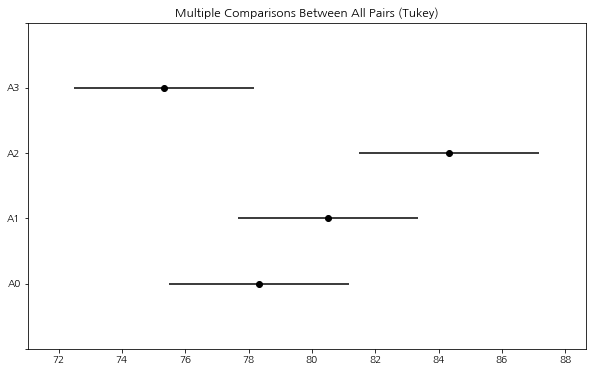

In [212]:
# 사후검정(Tukey HSD): 정규성, 등분산성, 샘플사이즈 동일
# from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

org_data = dt.melt()

display(org_data.head(3))


tukey = pairwise_tukeyhsd(endog=org_data['value'], groups=org_data['variable'], alpha=0.05)

print(tukey)
tukey.plot_simultaneous()
plt.axvline(0, color='red', linestyle='--')  # 평균 차이 0 기준선
plt.show()

사후검정 결과...  
- (A0-A2), (A1-A3), (A2-A3) 쌍에서 모평균의 차이가 있는 것으로 확인
- meandiff는 각 그룹간 모평균 차의 점추정량

In [238]:
# 수기 one-way ANOVA
o_means = dt.mean() #모집단별 평균
mu = o_means.values.mean() #전체평균
var = dt.var(ddof=1) #모집단별 분산
n = dt.shape[0]*dt.shape[1] #표본 전체개수
k = dt.shape[0] #모집단별 표본개수
level = dt.shape[1] # 그룹(수준)의 개수
dfr = level - 1 # 수준 자유도
dfe = n - dfr - 1# 오차 자유도

sstr = (k*(o_means - mu)**2).sum() #처리제곱: 각 수준 평균과 전체평균 차 제곱합
sse = ((k-1)*var).sum() #오차제곱
sst = (dt.values - mu).sum() #sstr + sse

MSR = sstr/dfr
MSE = sse/dfe
F = MSR/MSE

print(f"SSTR: {sstr:.3f}, SSE: {sse:.3f}, SST: {sst:.3f}")
print(f"MSR: {MSR:.3f}, MSE: {MSE:.3f}, F: {F:.3f}")

from scipy.stats import f
cv = f.ppf(1-a, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)

print(f"오른쪽 검정의 임계값: {cv:.3f} / 검정통계량: {F:.3f}")
print(f"유의수준 / 유의확률: {a} / {sp:.3f}") #기각

SSTR: 258.125, SSE: 247.500, SST: 0.000
MSR: 86.042, MSE: 12.375, F: 6.953
오른쪽 검정의 임계값: 3.098 / 검정통계량: 6.953
유의수준 / 유의확률: 0.05 / 0.002


#### 등분산인 one-way ANOVA(수준별 샘플사이즈가 다른 완전확률화계획법)

In [240]:
dt = [[81, 75, 69, 90, 72, 83], 
     [65, 80, 73, 79, 81, 69], 
     [72, 67, 62, 76, 80], 
     [89, 94, 79, 88]]

from scipy.stats import f_oneway

oa2 = f_oneway(*dt)
print(f"stat: {oa2.statistic:.3f}, p-value: {oa2.pvalue:.3f}") #귀무가설 기각

stat: 4.347, p-value: 0.019


In [250]:
# 사후검정: 정규성, 등분산성, 샘플사이즈 다름- Bonferroni

df = pd.DataFrame(dt).T
df.columns = ['A0', 'A1', 'A2', 'A3']
df = df.melt().dropna()

from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

mc = MultiComparison(data= df['value'], 
                    groups=df['variable']).allpairtest(testfunc=ttest_ind, method='bonf')

print(mc[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A0     A1  0.9218 0.3783       1.0  False
    A0     A2  1.5262 0.1613    0.9678  False
    A0     A3 -1.9591 0.0858    0.5146  False
    A1     A2  0.7506 0.4721       1.0  False
    A1     A3 -3.1239 0.0141    0.0849  False
    A2     A3 -3.5486 0.0094    0.0562  False
---------------------------------------------


보정된 p-value인 'pval_corr'을 확인해야 한다.  
유의수준 5% 하에서 모든 그룹 쌍이 0.05보다 크므로 모든 집단의 모평균의 차이가 없다.(귀무가설 기각 x)

####  이분산(등분산x)인 one-way ANOVA

In [255]:
#파라미터 use_var를 다르게 설정하여 다양한 분산분석 가능
#'equal': standard anova, 'unequal': Welch anova, 'bf': Brown-Forsythe

r = np.array([[76, 80, 78, 79, 83, 74], 
             [82, 75, 83, 78, 85, 80], 
             [79, 87, 88, 86, 84, 82], 
             [81, 74, 76, 78, 73, 70]]).T

dt = pd.DataFrame(r, columns = ['A1', 'A2', 'A3', 'A4'])

#Wehlch's one-way anova
welch = anova_oneway(data = dt.melt()['value'], 
                    groups=dt.melt()['variable'], 
                    use_var='unequal')

print(f"Welch's one-way stat {welch.statistic:.3f}, p-value {welch.pvalue:.3f}")

#Brown-Forsythe
bf = anova_oneway(data = dt.melt()['value'], 
                    groups=dt.melt()['variable'], 
                    use_var='bf')

print(f"Brown-Forsythe one-way stat {bf.statistic:.3f}, p-value {bf.pvalue:.3f}")

print("유의수준 5% 하에서 각 집단의 모평균의 차이가 모두 같지는 않다.")

Welch's one-way stat 6.019, p-value 0.011
Brown-Forsythe one-way stat 6.953, p-value 0.002
유의수준 5% 하에서 각 집단의 모평균의 차이가 모두 같지는 않다.


In [257]:
# 사후검정: GamesHowell
from pingouin import pairwise_gameshowell

dt = dt.melt()

gw = pairwise_gameshowell(data = dt, dv='value', between='variable')
display(gw)

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,A1,A2,78.333333,80.500000,-2.166667,1.383434,two-sided,-1.107436,9.805651,0.659345,-0.590196
1,A1,A3,78.333333,84.333333,-6.000000,1.333333,two-sided,-3.181981,9.944065,0.014513,-1.695801
2,A1,A4,78.333333,75.333333,3.000000,1.441450,two-sided,1.471657,9.583173,0.457487,0.784303
3,A2,A3,80.500000,84.333333,-3.833333,1.430812,two-sided,-1.894432,9.955991,0.246419,-1.009616
4,A2,A4,80.500000,75.333333,5.166667,1.532065,two-sided,2.384615,9.951485,0.098525,1.270854
5,A3,A4,84.333333,75.333333,9.000000,1.486981,two-sided,4.279788,9.819241,0.001000,2.280865


'pval'을 확인한다. 유의수준 5% 하에서  
(A1 - A3), (A3 - A4) 그룹 간 모평균의 차이가 있다. 

### Two-way ANOVA

| 용어                       | 의미                                          |
| ------------------------ | ------------------------------------------- |
| **모수인자 (fixed factor)**  | 실험자가 직접 설정하고 비교하고자 하는 요인 (예: 비료 종류, 온도 등)   |
| **변량인자 (random factor)** | 실험자가 통제하지 않거나 무작위로 추출된 요인 (예: 지역, 토양, 시간 등) |
| **조합별 데이터 수**            | 두 인자의 조합(A×B)마다 측정된 데이터 개수 (1개 or 2개 이상)    |


1. 모수인자(fixed factor)+모수인자의 조합별 데이터 수가 1개: 반복이 없는 이원배치 분산분석

| A (약 종류) | B (운동 유무) | 반응시간 |
| -------- | --------- | ---- |
| 약1       | 운동함       | 10   |
| 약1       | 운동안함      | 12   |
| 약2       | 운동함       | 15   |
| 약2       | 운동안함      | 14   |


2. 모수인자(fixed factor)+모수인자의 조합별 데이터 수가 2개 이상: 반복이 있는 이원배치 분산분석

| A (비료) | B (관수량) | 수확량1 | 수확량2 |
| ------ | ------- | ---- | ---- |
| A1     | B1      | 20   | 22   |
| A1     | B2      | 24   | 25   |
| A2     | B1      | 19   | 21   |
| A2     | B2      | 23   | 26   |


3. 모수인자+변량인자 조합별 데이터 수 1개: 난괴법 또는 확률화블럭계획법(RBD)

| 약 종류(A, fixed) | 사람(B, random) | 반응시간 |
| -------------- | ------------- | ---- |
| 약1             | 사람1           | 10   |
| 약1             | 사람2           | 12   |
| 약2             | 사람1           | 15   |
| 약2             | 사람2           | 14   |


4. 모수인자+변량인자 조합별 데이터 수 2개: 반복이 있는 이원배치 혼합모형(Mixed model)

| 비료(fixed) | 지역(random) | 수확량1 | 수확량2 |
| --------- | ---------- | ---- | ---- |
| A1        | 지역1        | 30   | 31   |
| A1        | 지역2        | 28   | 29   |
| A2        | 지역1        | 35   | 36   |
| A2        | 지역2        | 33   | 32   |

- 가설설정
  - H0: 변수 A, B에 따른 종속변수의 값에는 차이가 없으며, A-B의 상호작용 효과가 없다.
  - H1: 모든 변수에 따른 종속변수 값에 차이가 없는 것은 아니다. A-B의 상호작용 효과가 있다.
  - 사후검정: 
    - 모수인자+모수인자 조합인 경우, 교호작용 검증이 반드시 필요하며, 교호작용이 유의할 시 주효과 검정은 무의미(교호작용만)  
      교호작용이 없을 시 유의하지 않은 교호작용 효과를 오차항에 풀링 후 모수인자들의 주효과 검정을 진행
    - 모수인자+변량인자 조합인 경우, 교호작용이 유의할 때 모수인자의 주효과 검정만 의미가 있으며  
      교호작용이 유의하지 않으면 유의하지 않은 교호작용 효과를 오차항에 풀링 후 모수인자의 주효과 검정을 진행
      - 변량인자의 통계량: 이원배치 분산분석 설계의 상대적 효율성을 평가

- 참고
    
| 구분         | 모수인자 (Fixed Factor)   | 변량인자 (Random Factor) |
| ---------- | --------------------- | -------------------- |
| **정의**     | 비교하고자 하는 특정 수준 (범주)   | 모집단에서 무작위로 뽑힌 수준     |
| **수준 개수**  | 분석자가 **선택**한 것만 관심 있음 | 수준이 많거나 전체 중 일부 추출   |
| **목적**     | **수준 간 차이 비교가 목적**    | **변동성(분산) 설명이 목적**   |
| **예시**     | 비료 종류, 치료법, 교육 방법     | 지역, 실험자, 학교, 날씨 등    |
| **해석**     | 수준 간 효과를 직접 해석        | 수준은 대표성만 있고 추정치만 사용  |
| **결과 일반화** | **현재 수준에만 적용됨**       | **전체 모집단으로 일반화 가능**  |

#### 등분산인 two-way ANOVA(모수-모수)

In [258]:
#반복이 없는 이원배치 분산분석: 반복이 없으므로 교호작용 효과 검출 불가
dd = np.array([[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3], 
             [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], 
              [4, 3, 5, 5, 7, 6, 7, 8, 9, 8, 10, 12]]).T
dt = pd.DataFrame(dd, columns=['A', 'B', 'Y'])

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y ~ C(A) + C(B)", data=dt).fit()
result = anova_lm(model)

display(result)

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,8.0,4.0,4.0,0.078717
C(B),3.0,60.0,20.0,20.0,0.001586
Residual,6.0,6.0,1.0,NaN,NaN


A그룹과 종속변수 간 차이는 없고(0.078717), B그룹과 종속변수 간에는 차이가 있다.(0.001586)

In [288]:
#반복이 있는 이원배치 분산분석
# A, B 모두 모수인자
a = [1, 1, 1, 2, 2, 2, 3, 3, 3]*4
b = np.concatenate([[1]*9, [2]*9, [3]*9, [4]*9])
y = [64, 66, 70, 72, 81, 64, 74, 51, 65, 65, 63, 58, 57, 43, 52, 
     47, 58, 67, 59, 68, 65, 66, 71, 59, 58, 45, 42, 58, 50, 49, 
    57, 61, 53, 53, 59, 38]
df = pd.DataFrame({"A": a, "B": b, "Y": y})
display(df.head(5))

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y~C(A)*C(B)", data=df).fit() #이렇게 하면 상호작용까자 확인 가능
result2 = anova_lm(model)
display(result2)

,A,B,Y
0,1,1,64
1,1,1,66
2,1,1,70
3,2,1,72
4,2,1,81


,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,342.388889,171.194444,3.081500,0.064393
C(B),3.0,1002.888889,334.296296,6.017333,0.003307
C(A):C(B),6.0,588.944444,98.157407,1.766833,0.148795
Residual,24.0,1333.333333,55.555556,NaN,NaN


본 분석은 **모수+모수인자의 반복이 있는 이원배치 분산분석(two-way ANOVA)**으로, 먼저 두 모수 인자 간 **교호작용(A×B)**의 유무를 확인한다.

- H0: 두 요인 간 상호작용이 없다.
- H1: 두 요인 간 상호작용이 존재한다.(고정요인?)

A×B의 p-value는 0.148795로, 유의수준 5% 하에서 귀무가설을 기각할 수 없다.  
→ 따라서 두 요인 간 상호작용은 통계적으로 유의하지 않다.

In [289]:
model2 = ols("Y~C(A)+C(B)", data=df).fit() #이렇게 하면 상호작용까자 확인 가능
result3 = anova_lm(model2)
display(result3)

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,342.388889,171.194444,2.671744,0.085542
C(B),3.0,1002.888889,334.296296,5.217190,0.005102
Residual,30.0,1922.277778,64.075926,NaN,NaN


상호작용이 유의하지 않으므로, 각 요인의 **주효과(main effects)**를 해석한다. 유의수준 5% 하에서:

- 요인 A에 대한 가설
   - H₀: 요인 A는 종속변수에 유의미한 영향을 미치지 않는다.
   - H₁: 요인 A는 종속변수에 유의미한 영향을 미친다.

- 요인 B에 대한 가설
   - H₀: 요인 B는 종속변수에 유의미한 영향을 미치지 않는다.
   - H₁: 요인 B는 종속변수에 유의미한 영향을 미친다.

요인 A의 p-value는 0.085542로, 유의수준보다 크므로 귀무가설을 기각할 수 없다.  
→ 따라서 A는 종속변수에 유의미한 영향을 미치지 않는 것으로 판단된다.

요인 B의 p-value는 0.005102로, 유의수준보다 작아 귀무가설을 기각할 수 있다.  
→ 즉, B는 종속변수에 통계적으로 유의미한 영향을 미친다.

#### 등분산인 two-way ANOVA(모수인자-변량인자)

In [291]:
# 반복이 없는 경우: 난괴법, 확률화블럭계획법(RBD, Randomized block design)
# 모수: A, 변량: B
a = [1, 2, 3]*4
b = np.concatenate([[1]*3, [2]*3, [3]*3, [4]*3])
y = [4, 3, 5, 5, 7, 6, 7, 8, 9, 8, 10, 12]

df = pd.DataFrame({"A": a, "B": b, "Y": y})

display(df)

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y~C(A)+C(B)", data=df).fit()

result = anova_lm(model)

display(result)

,A,B,Y
0,1,1,4
1,2,1,3
2,3,1,5
3,1,2,5
4,2,2,7
5,3,2,6
6,1,3,7
7,2,3,8
8,3,3,9
9,1,4,8


,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,8.0,4.0,4.0,0.078717
C(B),3.0,60.0,20.0,20.0,0.001586
Residual,6.0,6.0,1.0,NaN,NaN


등분산이며 반복이 없는 모수-변량인자 이원분산분석(Two-Way ANOVA with Mixed Effects) 결과이다.
유의수준 5% 하에서:

- 고정인자 가설
  - H0: 고정인자 A는 종속변수에 유의미한 영향을 미치지 않는다.
  - H1: 고정인자 A는 종속변수에 유의미한 영향을 미친다.
- 변량인자 가설
  - H0: 변량인자 B는 종속변수의 분산에 유의미한 기여를 하지 않는다.
  - H1: 변량인자 B는 종속변수의 분산에 유의미한 기여를 한다.

**고정 효과(Fixed Effect)**인 A의 p-value는 0.078717로, 이는 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.
→ 즉, A는 종속변수에 대해 통계적으로 유의미한 영향을 미치지 않는 것으로 해석된다 (주효과 없음).

**변량 효과(Random Effect)**인 B의 p-value는 0.001586로 유의수준보다 작아 귀무가설을 기각할 수 있다.
→ 이는 B가 종속변수의 분산에 유의미한 기여를 한다는 의미로, 랜덤 효과로서 고려할 가치가 있음을 나타낸다.

In [297]:
# 반복이 있는 경우: 이원배치 혼합모형(mixed model)
# A가 모수인자, B가 변량인자

import statsmodels.api as sm
import statsmodels.formula.api as smf

a = [1, 1, 1, 2, 2, 2, 3, 3, 3]*4
b = np.concatenate([[1]*9, [2]*9, [3]*9, [4]*9])
y = [64, 66, 70, 72, 81, 64, 74, 51, 65, 65, 63, 58, 57, 43, 52, 
     47, 58, 67, 59, 68, 65, 66, 71, 59, 58, 45, 42, 58, 50, 49, 
    57, 61, 53, 53, 59, 38]

df = pd.DataFrame({"A": a, "B": b, "Y": y})

df['A'] = df['A'].astype('category')
df['B'] = df['B'].astype('category')

# 혼합모형 설정: A는 fixed, B는 random
model = smf.mixedlm("Y ~ C(A)*C(B)", data=df, groups="B")
result = model.fit()

# 결과 출력
print(result.summary())


                Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Y       
No. Observations:      36           Method:                  REML    
No. Groups:            4            Scale:                   55.5556 
Min. group size:       9            Log-Likelihood:          -88.8548
Max. group size:       9            Converged:               Yes     
Mean group size:       9.0                                           
---------------------------------------------------------------------
                     Coef.     Std.Err.     z    P>|z|  [0.025 0.975]
---------------------------------------------------------------------
Intercept            66.667         8.607  7.746 0.000  49.798 83.535
C(A)[T.2]             5.667         6.086  0.931 0.352  -6.261 17.595
C(A)[T.3]            -3.333         6.086 -0.548 0.584 -15.261  8.595
C(B)[T.2]            -4.667        12.172 -0.383 0.701 -28.523 19.189
C(B)[T.3]            -2.667        1

In [298]:
# 이걸로 할 것!
# 반복이 있는 경우: 이원배치 혼합모형(mixed model)
# A가 모수인자, B가 변량인자
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import pandas as pd
import numpy as np

# 데이터 준비
a = [1, 1, 1, 2, 2, 2, 3, 3, 3]*4
b = np.concatenate([[1]*9, [2]*9, [3]*9, [4]*9])
y = [64, 66, 70, 72, 81, 64, 74, 51, 65,
     65, 63, 58, 57, 43, 52, 47, 58, 67,
     59, 68, 65, 66, 71, 59, 58, 45, 42,
     58, 50, 49, 57, 61, 53, 53, 59, 38]

df = pd.DataFrame({'A': a, 'B': b, 'Y': y})
df["A"] = df["A"].astype("category")
df["B"] = df["B"].astype("category")

# 모든 요인을 고정(fixed effect)으로 보고 ANOVA 실시
model = smf.ols("Y ~ C(A) * C(B)", data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                sum_sq    df         F    PR(>F)
C(A)        342.388889   2.0  3.081500  0.064393
C(B)       1002.888889   3.0  6.017333  0.003307
C(A):C(B)   588.944444   6.0  1.766833  0.148795
Residual   1333.333333  24.0       NaN       NaN


✅ 분석 순서 (이해 기준)
1. 요인 A의 주효과 (fixed)
2. 요인 B의 주효과 (random)
3. A와 B의 교호작용 (interaction)

👉 교호작용(Interaction)을 먼저 검정하는 것이 원칙입니다.  
    유의한 교호작용이 존재한다면, 주효과 해석은 보류하거나 교호작용 중심으로 해석해야 합니다.

🔍 왜 교호작용부터 보나?
교호작용이 유의하면 → "A의 효과는 B에 따라 다르다"는 뜻  
그러면 단순히 A만의 평균 차이(Fixed Effect)는 무의미하거나 왜곡될 수 있음  
예: A=1이 B=1에서는 크고, B=2에서는 작다면 전체 평균은 왜곡됨

등분산이며 반복이 있는 **모수-변량 혼합설계(Mixed Model)**의 이원분산분석(Two-Way ANOVA) 결과이다.
유의수준 5% 하에서,

- 교호작용 A×B에 대한 가설
  - H₀ (귀무가설): 요인 A와 요인 B 사이에는 교호작용이 없다.
  - H₁(대립가설): 요인 A와 요인 B 사이에는 교호작용이 있다.
- 주효과: 요인 A (고정 효과, Fixed Factor)
  - H₀: 요인 A는 종속변수에 유의미한 영향을 미치지 않는다.
  - H₁: 요인 A는 종속변수에 유의미한 영향을 미친다.
- 주효과: 요인 B (변량 효과, Random Factor)
  - H₀: 요인 B에 의한 분산은 0이다. (요인 B는 종속변수의 분산에 기여하지 않는다)
  - H₁: 요인 B에 의한 분산은 0이 아니다. (요인 B는 종속변수의 분산에 유의미하게 기여한다)

A와 B의 교호작용(A×B)은 p-value가 0.148795로 통계적으로 유의하지 않다.  
따라서 각 요인의 **주효과(main effects)**를 개별적으로 해석할 수 있다.

요인 A는 **고정 효과(Fixed Factor)**이며, p-value가 0.064393으로 0.05보다 크므로 통계적으로 유의하지 않다.

요인 B는 **변량 효과(Random Factor)**로, 관련 분산 구성요소의 p-value가 0.003307로 통계적으로 유의하며,  
이는 B가 종속변수의 분산에 유의미한 기여를 한다는 것을 의미한다.

# 연습문제
1. 다음 데이터의 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 구간을 구하시오.  
   또한 다음 데이터의 모표준편차가 3이라는 것을 알고 있을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.
   - 10, 19, 15, 11, 13, 14, 18

In [313]:
#모분산 정보가 없을 때, 모평균 신뢰구간 추정: t 검정
# 모분산 정보가 있을 떄, 모평균 신뢰구간 추정: z 검정

dt1 = np.array([10, 19, 15, 11, 13, 14, 18])
t_m = dt1.mean()
t_std = dt1.std(ddof=1)
alpha = 0.05
df = len(dt1) - 1 #자유도

from scipy.stats import t

tt = t.ppf(1-alpha/2, df)
se = t_std/np.sqrt(len(dt1))

me = tt*se

print(f"모분산 정보가 없을 때, 모평균 신뢰구간 추정(t검정)[점추정: {t_m:.3f}]: {t_m - me:.3f} ~ {t_m + me:.3f}")

z_std = 3
n = len(dt1)

from scipy.stats import norm

z = norm.ppf(1-alpha/2)
se2 = z_std/np.sqrt(n)

me2 = z*se2

print(f"모표준편차를 알 때 모평균 신뢰구간 추정(z검정)[점추정: {t_m:.3f}]: {t_m - me2:.3f} ~ {t_m + me2:.3f}")

모분산 정보가 없을 때, 모평균 신뢰구간 추정(t검정)[점추정: 14.286]: 11.185 ~ 17.386
모표준편차를 알 때 모평균 신뢰구간 추정(z검정)[점추정: 14.286]: 12.063 ~ 16.508


2. 어느 제조회사의 불량률이 5%로 알려져 있다면, 95% 신뢰수준에서 오차의 한계가 3%가 되도록 하는 최소 표본사이즈를 구하시오.

In [319]:
p = 0.05
me = 0.03
z = norm.ppf(1-alpha/2)

p_sample_size = (p*(1-p))/np.square(me/z)

print(f"95% 신뢰수준에서 오차의 한계가 3%가 되는 최소 표본사이즈는 {np.ceil(p_sample_size)}이다.")

95% 신뢰수준에서 오차의 한계가 3%가 되는 최소 표본사이즈는 203.0이다.


3. 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오.(소수점 둘째자리까지 반올림)

In [333]:
# 모분산 신뢰구간 추정이므로 카이제곱 분포를 따른다. 

from scipy.stats import f

df = 30 - 1
f_var = 50
a = 0.05

from scipy.stats import chi2

co1 = chi2.ppf(1-a/2, df) # down
co2 = chi2.ppf(a, df)

down = df*f_var/co1
up = df*f_var/co2


print(f"신뢰수준 95%에서 신뢰구간은 {down:.3f} ~ {up:.3f}")


신뢰수준 95%에서 신뢰구간은 31.713 ~ 81.882


4. 어느 뽑기 기계에서 20번 뽑기를 했더니 그 중 5개는 미니카였다. 해당 뽑기 기계에 있는 장난감 중 미니카의 비율을 p라고 한다면,  
   모비율 p에 대한 95% 신뢰구간을 구하시오.

In [336]:
# 모분산을 모르며, 샘플 수가 20개이기 때문에 모비율 p 추정을 위해 t분포 사용
p = 5/20
n = 20
a = 0.05

from scipy.stats import norm

z = norm.ppf(1-a/2)
se = np.sqrt(p*(1-p)/n)
me = z*se

print(f"유의수준 5% 하 신뢰구간은 {p-me:.3f} ~ {p+me:.3f}")

유의수준 5% 하 신뢰구간은 0.060 ~ 0.440


5. A국가의 성인 남성의 흡연률이 35%라고 발표하였으나 B는 그것보다 더 높은 수치를 예상했다.  
   이에 성인 남성 중 450명을 임의 추출하여 조사한 결과, 180명이 흡연자인 것을 확인하였다.  
   이에 대하여 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오.(유의수준 5%)

In [346]:
# 일표본 모비율 left 검정: z 통계량
# H0: B국가의 성인 남성의 흡연율은 35%이다. / H1: B국가의 흡연율은 35%보다 높다.
# 실제로 주어진 건 B국가만이므로 대응표본이나 이표본이 아님

test_a = 0.05
p0 = 0.35 #고정된 확률
n = 450
p = 180/n
se = np.sqrt(p0*(1-p0)/n)
zstat = (p-p0)/se

# 단측(one-right): P > P0(0.35)
cv = norm.ppf(1-test_a/2) #임계값
sp = 1- norm.cdf(zstat)

print(f"유의수준 5% 하에서의 검정통계량: {zstat:.3f}, 임계값: {cv:.3f}")
print(f"p-value는 {sp:.3f}로 유의확률 5% 하에서 귀무가설을 기각할 수", "있다." if sp < 0.05 else "없다.")



유의수준 5% 하에서의 검정통계량: 2.224, 임계값: 1.960
p-value는 0.013로 유의수준 5% 하에서 귀무가설을 기각할 수 있다.


6. 모평균을 모르는 상황에서 표본의 정보를 통해 모분산이 10인지 아닌지 여부를 검정하고자 한다.  
   50개의 표본을 임의로 추출하여 계산한 결과, 표본의 분산은 8.8로 나타났다. 이에 대해 귀무가설과 대립가설을 세우고,  
   검정통계량을 계산하여 검정 결과를 서술하시오.(유의수준 5%)

In [352]:
# one sample 분산분석: 카이제곱 분포(모평균 모르는 상태)
# H0: 해당집단의 모분산은 10이다. / H1: 해당집단의 모분산은 10이 아니다.
a = 0.05
n = 50
df = n - 1
var0 = 10
var1 = 8.8
c_stat = df*var1/var0

from scipy.stats import chi2
#양측검정
cv1, cv2 = chi2.ppf(a/2, df), chi2.ppf(1-a/2, df) #임계값
if chi2.cdf(c_stat, df) < 0.5:
    p_value = (chi2.cdf(c_stat, df)*2)
else:
    p_value = (1-chi2.cdf(c_stat, df)*2)

print(f"유의수준 5% 하에서의 검정통계량: {c_stat:.3f}, 임계값: {cv1:.3f} ~ {cv2:.3f}")
print(f"p-value는 {p_value:.3f}로 유의확률 5% 하에서 귀무가설을 기각할 수", "있다." if p_value < 0.05 else "없다.")
print("즉, 해당집단의 모분산은 10으로 볼 수 있다.")

유의수준 5% 하에서의 검정통계량: 43.120, 임계값: 31.555 ~ 70.222
p-value는 0.581로 유의확률 5% 하에서 귀무가설을 기각할 수 없다.
즉, 해당집단의 모분산은 10으로 볼 수 있다.


7. 50명의 당뇨환자에 대해 신약 투약 이전과 이후의 평균 혈당 차이가 15, 표준편차가 4일 때 투약 전후 평균 혈당의 차이가 존재하는지  
   확인하고자 한다. 이에 대해 귀무가설과 대립가설을 제시하고, 검정통계량과 유의확률을 구하여 검정 결과를 서술하시오.(유의수준 5%)

In [364]:
#대응표본 t검정(표본크기가 30 이상이지만 모집단 크기가 알려져있지 않으므로?) 모분산도 모름
# H0: 투약 전후 평균혈당 차이가 존재하지 않는다. / H1: 투약 전후 평균혈당 차이가 존재한다.
a = 0.05
n = 50
d0 = 0
d_mean = 15 #점추정량
p_std = 4 # 표준편차
df = n-1

#검정통계량
se = p_std/np.sqrt(n)
tt = (d_mean - d0)/se

from scipy.stats import t

#양측검정
cv1, cv2 = t.ppf(a/2, df), t.ppf(1-a/2, df)
p_value = (1 - t.cdf(tt, df))*2
    
print(f"유의수준 5% 하에서의 검정통계량: {tt:.3f}, 임계값: {cv1:.3f} ~ {cv2:.3f}")
print(f"p-value는 {p_value:.3f}로 유의확률 5% 하에서 귀무가설을 기각할 수", "있다." if p_value < 0.05 else "없다.")
print("즉, 투약 전후 평균혈당 차이가 존재한다.")

유의수준 5% 하에서의 검정통계량: 26.517, 임계값: -2.010 ~ 2.010
p-value는 0.000로 유의확률 5% 하에서 귀무가설을 기각할 수 있다.
즉, 투약 전후 평균혈당 차이가 존재한다.


8. 가수 A에 대한 호감도가 남녀별로 다른지 알아보고자 다음과 같은 데이터를 얻었다.  
   남녀별로 지지율에 차이가 있는지 검정하시오.(유의수준 5%)
   - 남성(총 100명) 30% 호감 | 여성(총 180명) 35% 호감

In [368]:
# 독립 2표본 모비율 차 검정: z통계량
# H0: 가수 A에 대한 호감도가 남녀 지지율이 동일하다. / H1: 가수 A에 대한 호감도가 남녀 지지율이 다르다.
n1 = 100
n2 = 180
p1 = 0.3
p2 = 0.35
d0 = 0
a = 0.05

p = (n1*p1+n2*p2)/(n1+n2) #합동표본비율 p
se = np.sqrt(p*(1-p)*(1/n1+1/n2))
zstat = (p1-p2-d0)/se

#양측검정
cv1, cv2 = norm.ppf(a/2), norm.ppf(1-a/2)
p_value = (1- norm.cdf(np.abs(zstat))) * 2

print(f"유의수준 5% 하에서의 검정통계량: {zstat:.3f}, 임계값: {cv1:.3f} ~ {cv2:.3f}")
print(f"p-value는 {p_value:.3f}로 유의확률 5% 하에서 귀무가설을 기각할 수", "있다." if p_value < 0.05 else "없다.")
print("즉, 가수 A에 대한 호감도가 남녀 지지율이 동일하다.")

유의수준 5% 하에서의 검정통계량: -0.851, 임계값: -1.960 ~ 1.960
p-value는 0.395로 유의확률 5% 하에서 귀무가설을 기각할 수 없다.
즉, 가수 A에 대한 호감도가 남녀 지지율이 동일하다.


9. A 브랜드의 제품 14개를 추출하여 구한 평균과 표준편차는 각각 100g, 5g이고, B브랜드 제품 12개를 추출하여 구한 평균과 표준편차는  
   각각 110g, 6g이라면, 두 제품의 평균이 차이가 있는지 여부를 검정하시오.(유의수준 5%)

In [375]:
#독립 2표본 평균 차 검정: t분포(분산 다름)
#H0: 두 표본집단의 평균은 차이가 0이다. / H1: 두 표본집단의 평균은 차이가 있다.
a = 0.05
n1 = 14
mean1 = 100
std1 = 5
n2 = 12
mean2 = 110
std2 = 6
d0 = 0

df = ((std1**2/n1+std2**2)**2)/((1/(n1-1))*((s1**2/n1)**2) + (1/(n2-1))*((s2**2/n2)**2))

se =np.sqrt(std1**2/n1 + std2**2/n2)
tt = (mean1-mean2-d0)/se

from scipy.stats import t
#양측
p_value = (1- t.cdf(np.abs(tt), df))*2

print(f"검정통계량 : {tt:.3f}, p-value: {p_value:.3f}")
print("두 표본집단의 평균은 차이가 있다.")

검정통계량 : -4.571, p-value: 0.000
두 표본집단의 평균은 차이가 있다.


In [376]:
#라이브러리: 임의로 샘플을 만들어서 안 맞음 걍 참고만
from scipy.stats import ttest_ind

m1, s1, n1 = 100, 5, 14
m2, s2, n2 = 110, 6, 12

np.random.seed(0)

x1 = np.random.normal(loc=m1, scale=s1, size=n1)
x2 = np.random.normal(loc=m2, scale=s2, size=n2)

t_stat, p_value = ttest_ind(x1, x2, equal_var=False, alternative="two-sided")

print(f"통계량: {t_stat}, p_value: {p_value}")

통계량: -2.630020741488941, p_value: 0.017589365080092574


10. iris target별로 sepal length의 평균에 차이가 있는지 가설검정하시오. 차이가 있다면 어느 target들 사이에 평균 차이가 있는지  
    사후검정하시오.

In [392]:
from sklearn.datasets import load_iris
import pandas as pd

load = load_iris()
f_names = [f[:-5] for f in load['feature_names'][:]]
f_names

['sepal length', 'sepal width', 'petal length', 'petal width']